<a href="https://colab.research.google.com/github/quant-ar/portfolio-colab/blob/main/T%C3%A9cnicas_Big_Data_Cartera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###**TÉCNICAS DE BIG DATA PARA EL ANÁLISIS DE LA TEORÍA MODERNA DE OPTIMIZACIÓN DE CARTERAS DE INVERSIÓN EN EL MARCO DEL MERCADO ARGENTINO DE VALORES**




 *Facultad de Informática y Diseño*






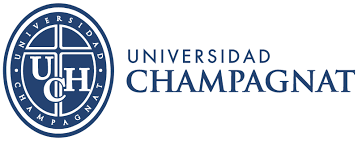

#Entorno computacional

##Librerias Phyton

Instalar librería

In [ ]:
pip install pyfolio

     |████████████████████████████████| 91 kB 5.1 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88681 sha256=d97a0c400725ad2c84b1c925df7831e01616e857011bcd8a3e35c422296ce1de
  Stored in directory: /root/.cache/pip/wheels/e4/96/9b/0dfff5453e702fd780a099b7c850521099c5ec0dfafae189f9
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39777 sha256=d3bdbfc75e132997882a1c9352349813b27dbf933cab9e776963824aa6d9b0f9
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


In [ ]:
pip install pyportfolioopt

     |████████████████████████████████| 61 kB 4.4 MB/s 
     |████████████████████████████████| 2.8 MB 16.9 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


Cargar librerias

In [ ]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.dates as dates
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import pandas_datareader as web
import pyfolio as pf


Cargar funciones

La pypfopt es de  pyportfolioopt

In [ ]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import objective_functions
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import HRPOpt
from pypfopt import CLA
from pypfopt import black_litterman
from pypfopt import BlackLittermanModel
from pypfopt import plotting

##Librerias R

Cargar función para poder usar R

In [ ]:
%load_ext rpy2.ipython

Instalar librería

In [ ]:
%%R
install.packages("quantmod")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 517875 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

In [ ]:
%%R
library(quantmod) 

R[write to console]: Loading required package: xts

R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: Loading required package: TTR

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
%%R
library(ggplot2)

#Estimar modelo de cartera según Markowitz

##Cargar datos

Ingresar fechas de entrenamiento

In [ ]:
start=pd.to_datetime("2011-01-01")
end=pd.to_datetime("2016-01-01")

Ingresar precios ajustados de las acciones a invertir

In [ ]:
stock_1=web.DataReader("TECO2.BA","yahoo",start,end)["Adj Close"]
stock_2=web.DataReader("COME.BA","yahoo",start,end)["Adj Close"]
stock_3=web.DataReader("BMA.BA","yahoo",start,end)["Adj Close"]
stock_4=web.DataReader("GGAL.BA","yahoo",start,end)["Adj Close"]
stock_5=web.DataReader("ALUA.BA","yahoo",start,end)["Adj Close"]

RemoteDataError: ignored

Armar estructura de datos y estimar retornos diarios

In [ ]:
n_stock=5

stocks=pd.concat([stock_1,stock_2,stock_3,stock_4,stock_5],axis=1)

stocks.columns=["stock_1","stock_2","stock_3","stock_4","stock_5"]

log_ret=np.log(stocks/stocks.shift(1))

Simular número de carteras con distintos pesos en cada acción

Definir número de interacciones

In [ ]:
num_ports=10000

Ejecutar la interacciones

In [ ]:
all_weights=np.zeros((num_ports,len(stocks.columns)))



for ind in range(num_ports):

     weights=np.array(np.random.random(n_stock))
     weights=weights/np.sum(weights)         
   
     all_weights[ind:]=weights
     
     

Crear data frame

In [ ]:
df=pd.DataFrame(all_weights)
df

,0,1,2,3,4
0,0.183639,0.415282,0.068307,0.071836,0.260935
1,0.182366,0.315681,0.328586,0.067389,0.105978
2,0.036754,0.214806,0.268935,0.172997,0.306507
3,0.357747,0.041013,0.489065,0.079036,0.033139
4,0.374111,0.315315,0.029421,0.213773,0.067380
...,...,...,...,...,...
9995,0.087619,0.102332,0.085745,0.070151,0.654153
9996,0.361094,0.340362,0.097102,0.139583,0.061858
9997,0.135150,0.223854,0.312182,0.196440,0.132375
9998,0.094085,0.155436,0.304440,0.323953,0.122086


Dar nombre al índice

In [ ]:
df.index=np.arange(0, len(df.index), 1)
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
           dtype='int64', length=10000)

Calcular el Sharpe ratio

In [ ]:
ret_arr=np.zeros(len(df.index))
vol_arr=np.zeros(len(df.index))
sharpe_arr=np.zeros(len(df.index))


In [ ]:
for ind in range(len(df.index)):

     ret_arr[ind]=np.sum((log_ret.mean()*df.iloc[ind].values.tolist())*252)

     vol_arr[ind]=np.sqrt(np.dot(df.iloc[ind].values.tolist(),np.dot(log_ret.cov()*252,df.iloc[ind].values.tolist()))) 

     sharpe_arr[ind]=ret_arr[ind]/vol_arr[ind]




Imprimir la cartera con el mayor Sharpe ratio y los pesos para cada acción

In [ ]:
print("Mayor Sharpe: ", sharpe_arr.max())
print("Lugar del mayor sharpe: ",sharpe_arr.argmax()) 
print("Pesos del mayor sharpe: ",df.iloc[sharpe_arr.argmax()])


Mayor Sharpe:  0.8915226094715628
Lugar del mayor sharpe:  76
Pesos del mayor sharpe:  0    0.001647
1    0.385999
2    0.007388
3    0.494138
4    0.110828
Name: 76, dtype: float64


Gráficar fontera de inversión

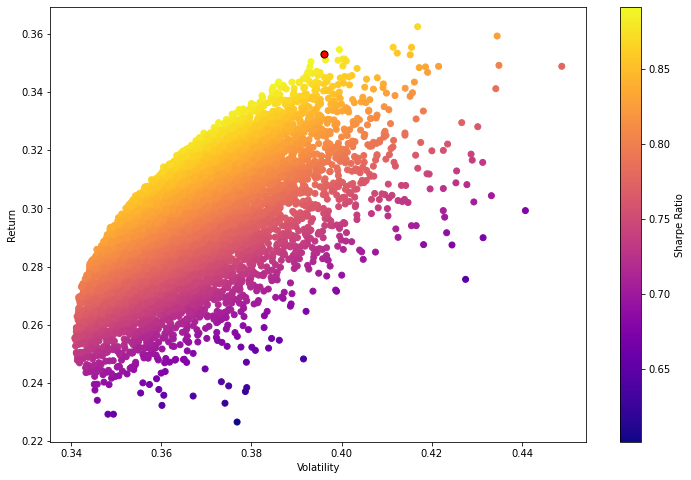

In [ ]:
max_sr_ret=ret_arr[sharpe_arr.argmax()]
max_sr_vol=vol_arr[sharpe_arr.argmax()]
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap="plasma")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")

plt.scatter(max_sr_vol,max_sr_ret,c="red",s=50,edgecolors="black")
     

##Test cartera 

Se va a correr el test a 5 posterior a las fechas de entrenamiento

In [ ]:
#start=pd.to_datetime("2016-01-01")
#end=pd.to_datetime("2021-01-01")


start=pd.to_datetime("2019-07-01")
end=pd.to_datetime("2021-07-01")

Ingresar los stocks con las nuevas fechas

In [ ]:
#stock_1=web.DataReader("TECO2.BA","yahoo",start,end)["Adj Close"]
#stock_2=web.DataReader("COME.BA","yahoo",start,end)["Adj Close"]
#stock_3=web.DataReader("BMA.BA","yahoo",start,end)["Adj Close"]
#stock_4=web.DataReader("GGAL.BA","yahoo",start,end)["Adj Close"]
#stock_5=web.DataReader("ALUA.BA","yahoo",start,end)["Adj Close"]



stock_1=web.DataReader("KO","yahoo",start,end)["Adj Close"]
stock_2=web.DataReader("GS","yahoo",start,end)["Adj Close"]
stock_3=web.DataReader("GS","yahoo",start,end)["Adj Close"]
stock_4=web.DataReader("GGAL.BA","yahoo",start,end)["Adj Close"]
stock_5=web.DataReader("ALUA.BA","yahoo",start,end)["Adj Close"]

RemoteDataError: ignored

Armar estructura de datos y estiamar retornos diarios

In [ ]:
n_stock=5

stocks=pd.concat([stock_1,stock_2,stock_3,stock_4,stock_5],axis=1)

stocks.columns=["stock_1","stock_2","stock_3","stock_4","stock_5"]

log_ret=np.log(stocks/stocks.shift(1))

Cargar pesos estimados en la seccióón anterior

In [ ]:
pesos_m=[ 0.001647 ,  0.385999 ,   0.007388 ,   0.494138  ,  0.110828]  

Sumario básico estadística para cada acción

In [ ]:
log_ret.describe()

,stock_1,stock_2,stock_3,stock_4,stock_5
count,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,0.001449,0.000482,0.001017,0.001050,0.001306
std,0.029059,0.029684,0.040018,0.038912,0.029950
min,-0.235179,-0.328809,-0.625780,-0.636084,-0.220282
25%,-0.012556,-0.013408,-0.016241,-0.014915,-0.013711
50%,0.000000,0.000000,0.002012,0.000402,0.000000
75%,0.016073,0.014761,0.018256,0.017816,0.018051
max,0.163513,0.122602,0.188031,0.164128,0.173663


Estimamos rendimiento diario cartera usando los pesos estimados

In [ ]:
rendimiento_cartera = pd.Series(np.dot(pesos_m, log_ret.T), index=log_ret.index)
rendimiento_cartera

Date
2016-01-04         NaN
2016-01-05    0.008029
2016-01-06   -0.007318
2016-01-07   -0.001429
2016-01-08   -0.008988
                ...   
2020-12-22    0.011140
2020-12-23    0.031361
2020-12-28   -0.009378
2020-12-29    0.011665
2020-12-30   -0.012200
Length: 1220, dtype: float64

### Imprimir sumario estadístico-financiero para el período de test

Start date,2016-01-04
End date,2020-12-30
Total months,58
,Backtest
Annual return,9.6%
Cumulative returns,55.8%
Annual volatility,47.5%
Sharpe ratio,0.46
Calmar ratio,0.14
Stability,0.17
Max drawdown,-70.4%


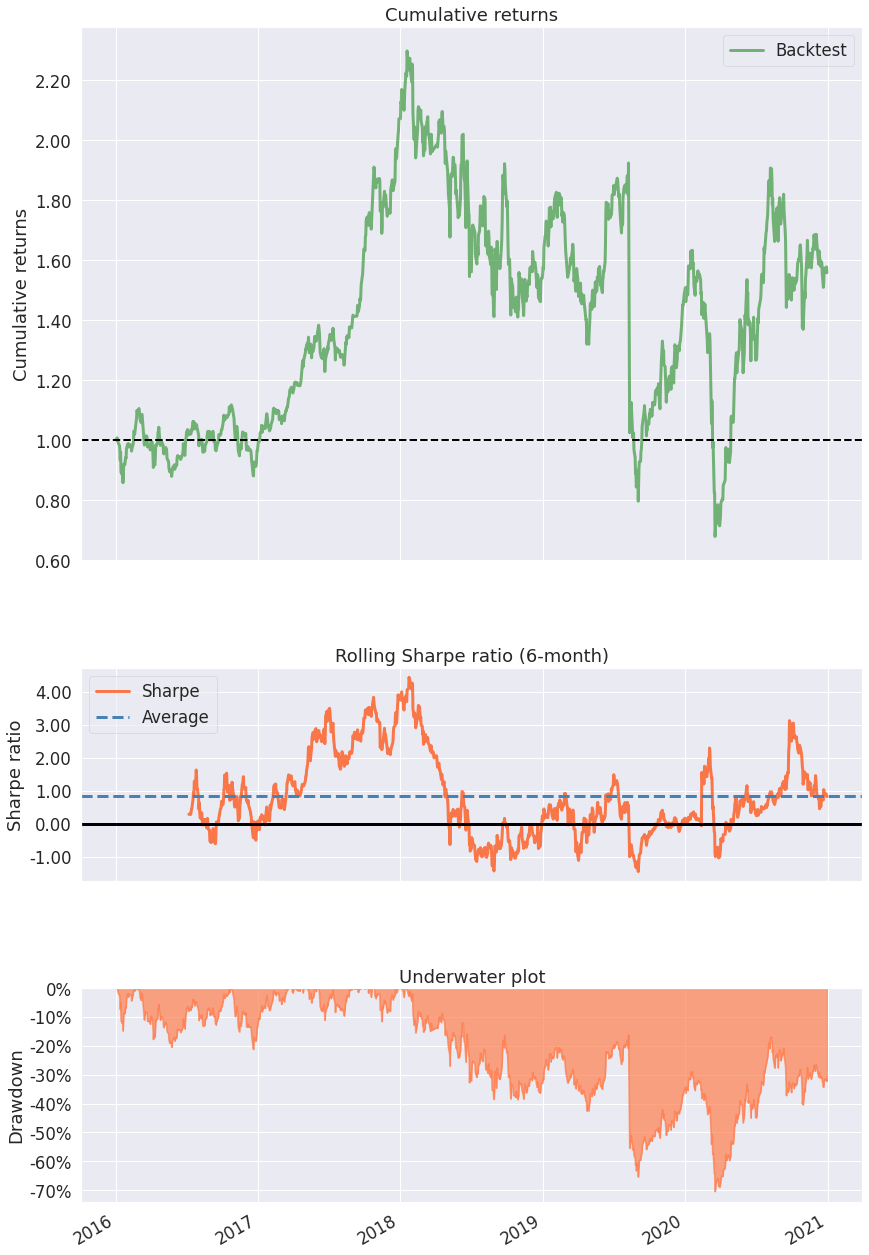

In [ ]:
pf.create_simple_tear_sheet(rendimiento_cartera)

#Estimar modelo de cartera según 1/n

Como el modelo no necesita entrenamiento pasamos a hacer el test en el mismo período que el anterior

##Test cartera 

Cargamos pesos

In [ ]:
pesos_m=[1/5,1/5,1/5,1/5,1/5]

Estimamos rendimiento diario cartera usando igual peso para cada acción

In [ ]:
rendimiento_cartera = pd.Series(np.dot(pesos_m, log_ret.T), index=log_ret.index)
rendimiento_cartera

Date
2016-01-04         NaN
2016-01-05    0.019329
2016-01-06   -0.003905
2016-01-07   -0.000980
2016-01-08   -0.004059
                ...   
2020-12-22    0.006746
2020-12-23    0.014133
2020-12-28   -0.015780
2020-12-29    0.021776
2020-12-30   -0.010200
Length: 1220, dtype: float64

### Imprimir sumario estadístico-financiero para el período de test

Start date,2016-01-04
End date,2020-12-30
Total months,58
,Backtest
Annual return,18.4%
Cumulative returns,126.4%
Annual volatility,42.7%
Sharpe ratio,0.63
Calmar ratio,0.35
Stability,0.65
Max drawdown,-53.0%


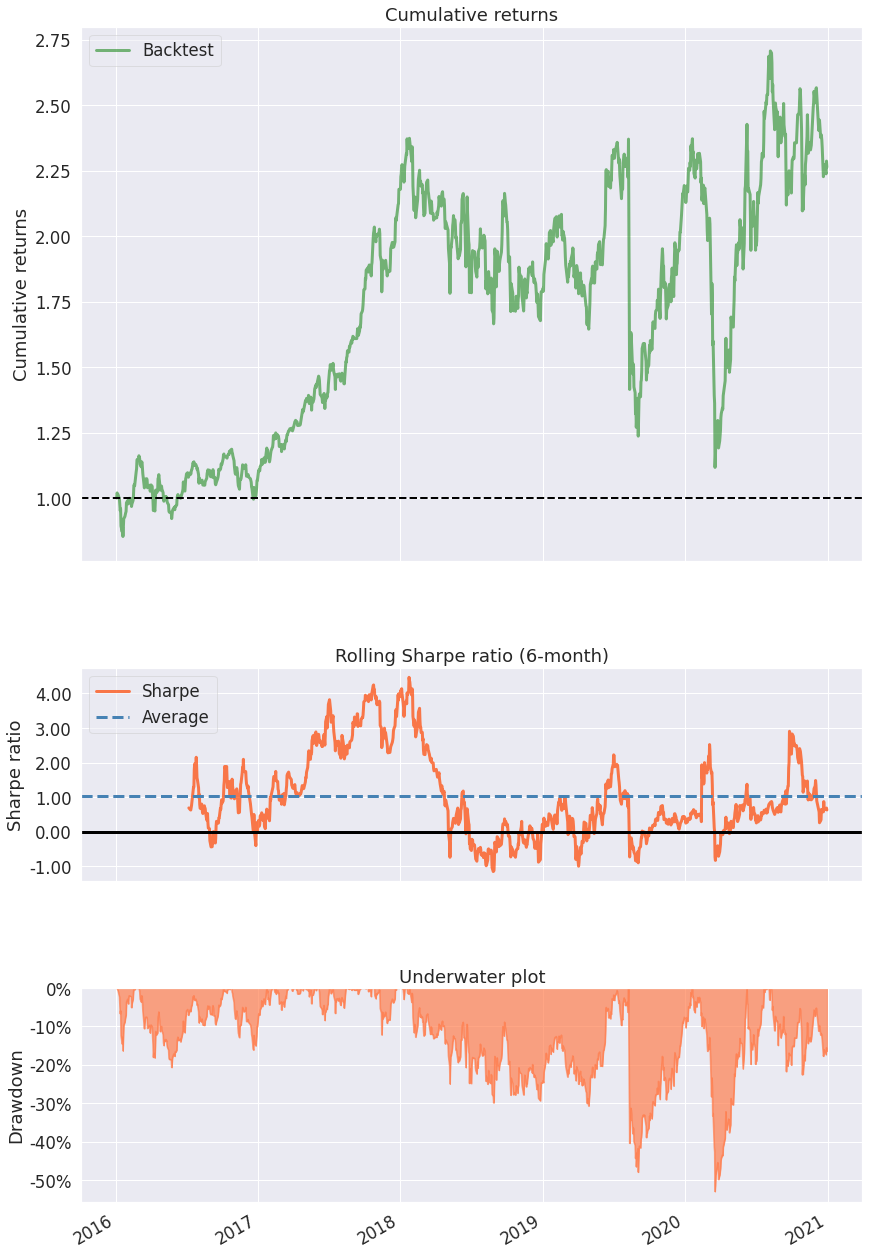

In [ ]:
pf.create_simple_tear_sheet(rendimiento_cartera)

#Estimar cartera usando Kelly Criterio

Para estimar usando Kelly criterio se necesita determinar dos parámetros la probabilidad de ganacia y el ratio de ganancia/pérdida

##Probabilidad de ganar

In [ ]:
z%%R
  stocks=c("AGRO.BA","AUSO.BA","ALUA.BA", "BBAR.BA","BHIP.BA","BOLT.BA","BPAT.BA",
           "BRIO.BA","BMA.BA","BYMA.BA","BRIO6.BA", "CADO.BA","CAPX.BA","CARC.BA",
           "CECO2.BA","CELU.BA","CGPA2.BA","CTIO.BA","CEPU.BA","COME.BA","CRES.BA",
           "CVH.BA","CAPU.BA","COLO.BA","DGCU2.BA","DYCA.BA", "EDN.BA","ESME.BA",
           "FERR.BA","FIPL.BA","GAMI.BA","GARO.BA","GBAN.BA","GCLA.BA","GRIM.BA",
           "GGAL.BA","HARG.BA","HAVA.BA","INTR.BA","INVJ.BA","IRCP.BA","IRSA.BA",
           "INDU.BA","LEDE.BA","LOMA.BA","LONG.BA","METR.BA","MOLI.BA","MORI.BA", 
           "MIRG.BA","OEST.BA","PATA.BA","PGR.BA","PAMP.BA","PATY.BA", "RICH.BA",
           "RIGO.BA","ROSE.BA","SAMI.BA","SEMI.BA","SUPV.BA","TGLT.BA","TECO2.BA",
           "TGNO4.BA","TGSU2.BA","TRAN.BA","TXAR.BA","TEF.BA","VALO.BA", "YPFD.BA")
  
#limpiar del simbolo con problemas Argentina

stocks=stocks[!stocks %in% "CEPU.BA"]
stocks=stocks[!stocks %in% "GRIM.BA"]
stocks=stocks[!stocks %in% "TXAR.BA"]
stocks=stocks[!stocks %in% "VALO.BA"]
stocks=stocks[!stocks %in% "CAPU.BA"]
stocks=stocks[!stocks %in% "BRIO6.BA"]
stocks=stocks[!stocks %in% "BYMA.BA"] 
stocks=stocks[!stocks %in% "CVH.BA"]
stocks=stocks[!stocks %in% "COLO.BA"]
stocks=stocks[!stocks %in% "HAVA.BA"]
stocks=stocks[!stocks %in% "INDU.BA"]
stocks=stocks[!stocks %in% "LOMA.BA"]
stocks=stocks[!stocks %in% "PATY.BA"]
stocks=stocks[!stocks %in% "RICH.BA"]
stocks=stocks[!stocks %in% "SUPV.BA"]
stocks=stocks[!stocks %in% "TEF.BA"]




In [ ]:
%%R

#Numero de muestra

n=1

#Definar vectores 

ratio=NULL
prob_ganancia=NULL


while(n<=length(stocks)){



#Cargar fechas

f_init='2010-01-01'
f_final='2015-01-01'

#Cargar simbolo

eq= stocks[n]

#------------------------------------------------------------------
#Descargar datos de yahoo

#Primero año--->mes--->dia
data_eq <- new.env()
getSymbols(eq, src = 'yahoo', from = f_init, to=f_final,env = data_eq, auto.assign = T, periodicity = "d")
suppressWarnings(try(for(i in ls(data_eq)) data_eq[[i]] = adjustOHLC(data_eq[[i]], use.Adjusted=T),silent = TRUE)) 


#-------------------------------------------------------------------
#Extraer Precio ajustado

precios=as.numeric(data_eq[[eq]][,6])

#-----------------------------------------------------------------
#Controlar los NA

i=1
while(i<length(precios)+1){
  if(is.na(precios[i])==TRUE){
    precios[i]=precios[i-1]
  }
  i=i+1
}

#Estimar ratio ganacia/perdida

precios=precios/precios[1]
ratio[n]=precios[length(precios)]

#Estimar probabilidad de ganancia


if(precios[length(precios)]>=1){
    
    prob_ganancia[n]=1

}else{
    
    prob_ganancia[n]=0
}


n=n+1

}

R[write to console]: ‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




In [ ]:
%%R
mean(ratio)

[1] 3.696499


In [ ]:
%%R
mean(prob_ganancia)

[1] 0.8888889


In [ ]:
%%writefile main.cpp


//----------------------------------------------------------
// librerias
//----------------------------------------------------------
//librerias estandar
#include<iostream>


//----------------------------------------------------------
//Funciones

using namespace std;

//funcion principal

int main(){
 
    //---------------------------------
    //Definir variables
    
    double probabilidad_ganancia=0.88;
    double ratio= 3.69;
    double peso=0;

    //--------------------------------
    //Ejecutar funcion  
    
    
    peso=(ratio*probabilidad_ganancia-(1-probabilidad_ganancia))/ratio;
    
    //--------------------------------
    //Imprimir resultado
    
    cout <<"\nEl peso por acción es: "<<peso<<endl;
   


    return 0;
}

Writing main.cpp


In [ ]:
%%script bash

g++ main.cpp -std=c++11
./a.out


El peso por acción es: 0.84748


##Test cartera 

In [ ]:
pesos_m=[0.84,0,0,0,0.16]

In [ ]:
rendimiento_cartera = pd.Series(np.dot(pesos_m, log_ret.T), index=log_ret.index)
rendimiento_cartera

Date
2016-01-04         NaN
2016-01-05    0.055950
2016-01-06    0.001905
2016-01-07   -0.010556
2016-01-08    0.023207
                ...   
2020-12-22   -0.023476
2020-12-23   -0.017217
2020-12-28   -0.022624
2020-12-29    0.043864
2020-12-30   -0.009684
Length: 1220, dtype: float64

Start date,2016-01-04
End date,2020-12-30
Total months,58
,Backtest
Annual return,30.9%
Cumulative returns,268.3%
Annual volatility,42.1%
Sharpe ratio,0.85
Calmar ratio,0.79
Stability,0.89
Max drawdown,-39.3%


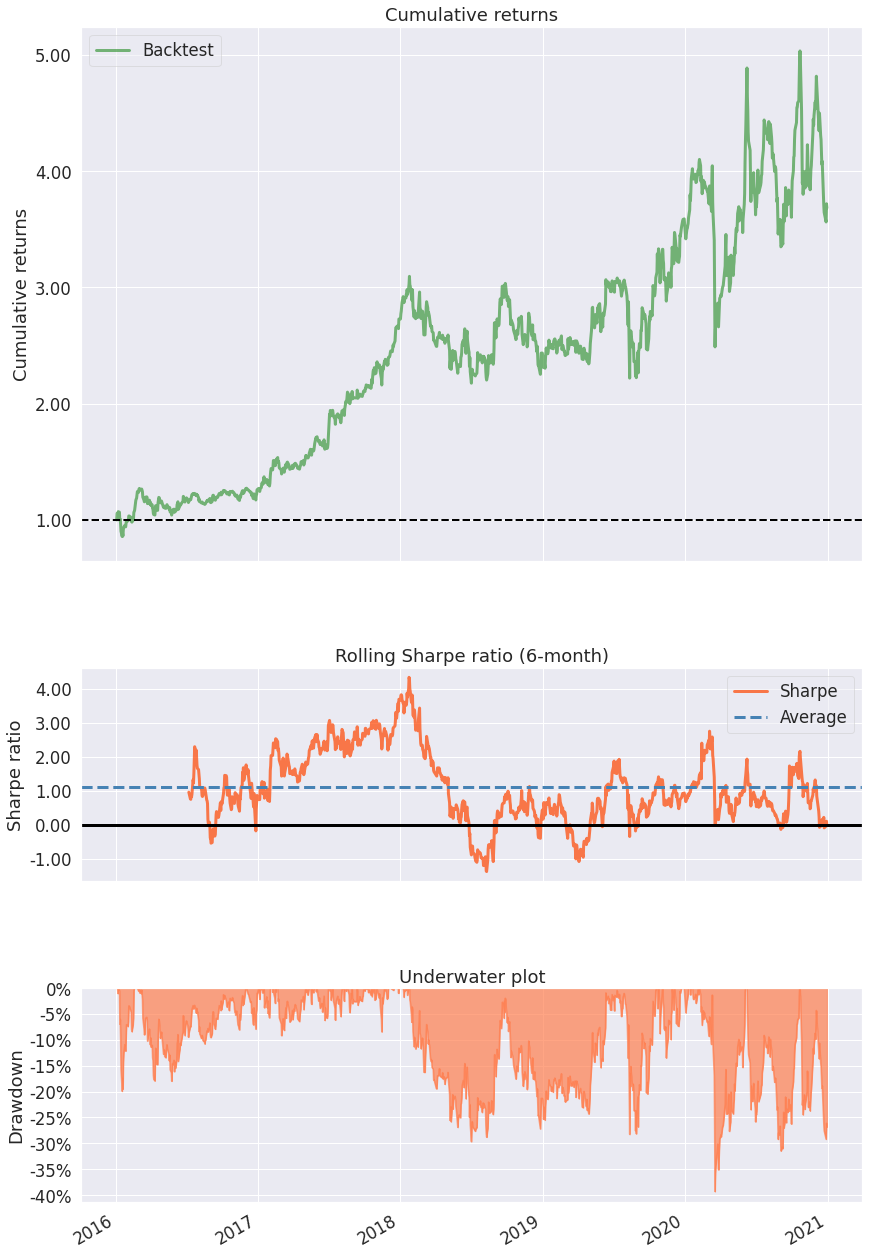

In [ ]:
pf.create_simple_tear_sheet(rendimiento_cartera)

#Treinor - Black model

Fuente:

https://breakingdownfinance.com/finance-topics/modern-portfolio-theory/treynor-black-model/

In [ ]:
#"TECO2.BA", "COME.BA", "BMA.BA","GGAL.BA","ALUA.BA"

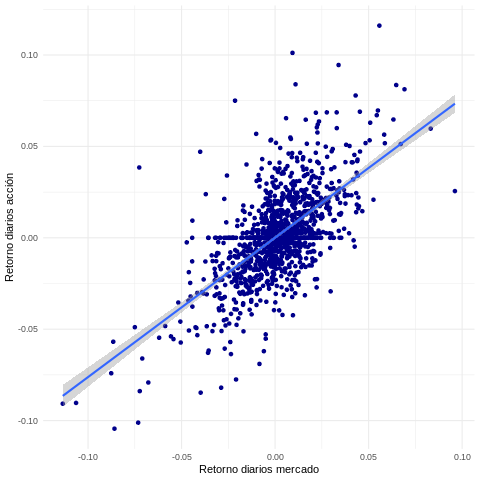

In [ ]:
%%R

#Cargar fechas

f_init='2010-01-01'
f_final='2015-01-01'

#Indice

eq= "^MERV"


#Primero año--->mes--->dia
data_eq <- new.env()
getSymbols(eq, src = 'yahoo', from = f_init, to=f_final,env = data_eq, auto.assign = T, periodicity = "d")
suppressWarnings(try(for(i in ls(data_eq)) data_eq[[i]] = adjustOHLC(data_eq[[i]], use.Adjusted=T),silent = TRUE)) 

#Extraer precios

precios_indice=as.numeric(data_eq[["MERV"]][,6])



#-----------------------------------------------------------------------------------
#Controlar los NA

i=1
while(i<length(precios_indice)+1){
  if(is.na(precios_indice[i])==TRUE){
    precios_indice[i]=precios_indice[i-1]
  }
  i=i+1
}



#-----------------------------------------------------------------
#Cargar simbolo

eq="ALUA.BA"

#------------------------------------------------------------------
#Descargar datos de yahoo

#Primero año--->mes--->dia
data_eq <- new.env()
getSymbols(eq, src = 'yahoo', from = f_init, to=f_final,env = data_eq, auto.assign = T, periodicity = "d")
suppressWarnings(try(for(i in ls(data_eq)) data_eq[[i]] = adjustOHLC(data_eq[[i]], use.Adjusted=T),silent = TRUE)) 



#-------------------------------------------------------------------
#Extraer Precio ajustado

precios=as.numeric(data_eq[[eq]][,6])

#-----------------------------------------------------------------
#Controlar los NA

i=1
while(i<length(precios)+1){
  if(is.na(precios[i])==TRUE){
    precios[i]=precios[i-1]
  }
  i=i+1
}



#------------------------------------------------------------------------------------
#Estimar Alfa y Beta
#----------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------
#Diferenciar

dif_log_precios_indice=diff(log(precios_indice), lag = 1)
dif_log_precios=diff(log(precios),lag = 1)


#---------------------------------------------------------------------------------


#Armar data frame
data_dif_log=data.frame(dif_log_precios=dif_log_precios,
                        dif_log_precios_indice=dif_log_precios_indice)


#------------------------------------------------------------------------------------
#Graficar

g=ggplot(data_dif_log, aes(x = dif_log_precios_indice, y = dif_log_precios)) 
g=g+geom_point(color = "darkblue")
g=g+geom_smooth(method=lm,formula = y ~ poly(x, 1))
g=g+xlab("Retorno diarios mercado") + ylab("Retorno diarios acción")
g=g+theme(plot.title = element_text(hjust = 0.5))
g=g+theme_minimal()
g


In [ ]:
%%R
#------------------------------------------------------------------------------------
#Correr modelo lineal

m_alfa_beta=lm(dif_log_precios~dif_log_precios_indice)
summary(m_alfa_beta)


Call:
lm(formula = dif_log_precios ~ dif_log_precios_indice)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.062690 -0.010541 -0.000950  0.009056  0.094014 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.728e-05  5.251e-04   0.147    0.883    
dif_log_precios_indice 7.626e-01  2.622e-02  29.084   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01833 on 1220 degrees of freedom
Multiple R-squared:  0.4095,	Adjusted R-squared:  0.409 
F-statistic: 845.9 on 1 and 1220 DF,  p-value: < 2.2e-16



In [ ]:
%%writefile main.cpp


//----------------------------------------------------------
// librerias
//----------------------------------------------------------
//librerias estandar
#include <iostream>
#include <cmath>
//include <boost/quote.hpp>


//----------------------------------------------------------
//Funciones

using namespace std;

//funcion principal

int main(){
 
    //---------------------------------
    //Definir variables
    

    //alphas

    double alpha_1=0.0003188;
    double alpha_2=0.0005501;
    double alpha_3=0.0002069;
    double alpha_4=0.0005521;
    double alpha_5=0.0000772;
   
    //Vars

    double var_1=pow(0.01885,2);
    double var_2=pow(0.02844,2);
    double var_3=pow(0.02018,2);
    double var_4=pow(0.6331,2);
    double var_5=pow( 0.01833,2);

    //Pesos

    double w_1=0;
    double w_2=0;
    double w_3=0;
    double w_4=0;
    double w_5=0;




    //--------------------------------
    //Funciones
   

      w_1=(alpha_1/var_1)/(alpha_1/var_1+alpha_2/var_2+alpha_3/var_3+alpha_4/var_4+alpha_5/var_5);
      w_2=(alpha_2/var_2)/(alpha_1/var_1+alpha_2/var_2+alpha_3/var_3+alpha_4/var_4+alpha_5/var_5);
      w_3=(alpha_3/var_3)/(alpha_1/var_1+alpha_2/var_2+alpha_3/var_3+alpha_4/var_4+alpha_5/var_5);
      w_4=(alpha_4/var_4)/(alpha_1/var_1+alpha_2/var_2+alpha_3/var_3+alpha_4/var_4+alpha_5/var_5);
      w_5=(alpha_5/var_5)/(alpha_1/var_1+alpha_2/var_2+alpha_3/var_3+alpha_4/var_4+alpha_5/var_5);
    

  
  //-----------------------------------
  //Imprimir resultados
   
    
    cout <<"\n w_1: "<<w_1<<endl;
    cout <<"\n w_2: "<<w_2<<endl;
    cout <<"\n w_3: "<<w_3<<endl;
    cout <<"\n w_4: "<<w_4<<endl;
    cout <<"\n w_5: "<<w_5<<endl;
   
    
   


    return 0;
}

Overwriting main.cpp


In [ ]:
%%script bash

g++ main.cpp -std=c++11
./a.out


 w_1: 0.387308

 w_2: 0.293591

 w_3: 0.21932

 w_4: 0.000594612

 w_5: 0.0991865


In [ ]:
pesos_m=[0.387308,0.293591,0.21932, 0.000594612,0.0991865]

In [ ]:
rendimiento_cartera = pd.Series(np.dot(pesos_m, log_ret.T), index=log_ret.index)
rendimiento_cartera

Date
2016-01-04         NaN
2016-01-05    0.030737
2016-01-06    0.002005
2016-01-07   -0.003603
2016-01-08    0.008599
                ...   
2020-12-22   -0.003734
2020-12-23    0.007044
2020-12-28   -0.017404
2020-12-29    0.025880
2020-12-30   -0.008536
Length: 1220, dtype: float64

Start date,2016-01-04
End date,2020-12-30
Total months,58
,Backtest
Annual return,19.9%
Cumulative returns,140.7%
Annual volatility,40.0%
Sharpe ratio,0.66
Calmar ratio,0.42
Stability,0.72
Max drawdown,-47.1%


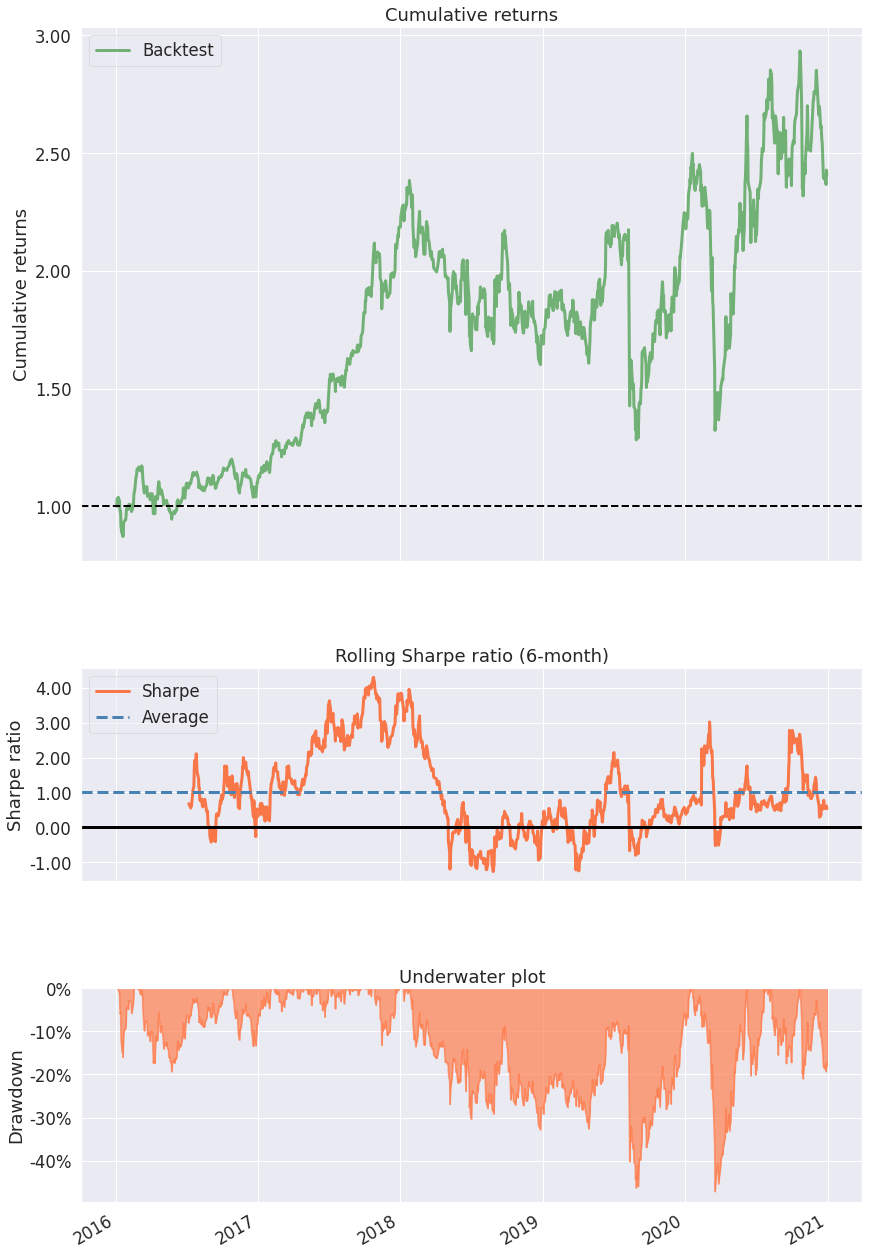

In [ ]:
pf.create_simple_tear_sheet(rendimiento_cartera)

# Black-Litterman 





Fuente:

https://python-advanced.quantecon.org/black_litterman.html

https://www.kaggle.com/takahiro1127/portfolio-optimization-black-litterman-model

https://github.com/robertmartin8/PyPortfolioOpt/blob/master/examples.py

In [ ]:
start=pd.to_datetime("2011-01-01")
end=pd.to_datetime("2016-01-01")

NameError: ignored

In [ ]:
stock_1=web.DataReader("TECO2.BA","yahoo",start,end)["Adj Close"]
stock_2=web.DataReader("COME.BA","yahoo",start,end)["Adj Close"]
stock_3=web.DataReader("BMA.BA","yahoo",start,end)["Adj Close"]
stock_4=web.DataReader("GGAL.BA","yahoo",start,end)["Adj Close"]
stock_5=web.DataReader("ALUA.BA","yahoo",start,end)["Adj Close"]

In [ ]:
#Armar matrix

stocks=pd.concat([stock_1,stock_2,stock_3,stock_4,stock_5],axis=1)
stocks

In [ ]:
stocks.columns=["stock_1","stock_2","stock_3","stock_4","stock_5"]
stocks

In [ ]:
df=pd.DataFrame(stocks)
df

In [ ]:
returns = df.pct_change().dropna()
returns

In [ ]:
mu = expected_returns.mean_historical_return(df)
mu

In [ ]:
S = risk_models.sample_cov(df)
S

In [ ]:
# Now try with a nonconvex objective from  Kolm et al (2014)
def deviation_risk_parity(w, cov_matrix):
    diff = w * np.dot(cov_matrix, w) - (w * np.dot(cov_matrix, w)).reshape(-1, 1)
    return (diff ** 2).sum().sum()


In [ ]:
ef = EfficientFrontier(mu, S)
weights = ef.nonconvex_objective(deviation_risk_parity, ef.cov_matrix)
ef.portfolio_performance(verbose=True)

In [ ]:
spy_prices=df

In [ ]:
delta = black_litterman.market_implied_risk_aversion(spy_prices)
delta

In [ ]:
mcaps = {
    "stock_1":  0.227378,
    "stock_2": 0.452579,
    "stock_3": 0.329248,
    "stock_4":  0.438287,
    "stock_5":  0.275837,
}

In [ ]:
prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
prior

In [ ]:
views = np.array([0.227378, 0.452579, 0.329248,0.438287,0.275837]).reshape(-1, 1)
views

In [ ]:
picking = np.array(
    [
        [1, 0, 0, 0,0],
        [0, 1, 0, 0,0],
        [0, 0, 1, 0,0],
        [0, 0, 0, 1,0],
        [0, 0, 0, 0,1],
    ]
)

In [ ]:
#bl = BlackLittermanModel(S, Q=views, P=picking,pi=prior, tau=0.01)
bl = BlackLittermanModel(S, Q=views, P=picking, tau=0.01)
bl

In [ ]:
rets = bl.bl_returns()
rets

In [ ]:
ef = EfficientFrontier(rets, S)
ef

In [ ]:
ef.max_sharpe()

In [ ]:
Estos son los pesos

In [ ]:
print(ef.clean_weights())

In [ ]:
0+0.31006+0+0.53088+ 0.15906

In [ ]:
ef.portfolio_performance(verbose=True)

In [ ]:
start=pd.to_datetime("2016-01-01")
end=pd.to_datetime("2021-01-01")

In [ ]:
stock_1=web.DataReader("TECO2.BA","yahoo",start,end)["Adj Close"]
stock_2=web.DataReader("COME.BA","yahoo",start,end)["Adj Close"]
stock_3=web.DataReader("BMA.BA","yahoo",start,end)["Adj Close"]
stock_4=web.DataReader("GGAL.BA","yahoo",start,end)["Adj Close"]
stock_5=web.DataReader("ALUA.BA","yahoo",start,end)["Adj Close"]

In [ ]:
n_stock=5

stocks=pd.concat([stock_1,stock_2,stock_3,stock_4,stock_5],axis=1)

stocks.columns=["stock_1","stock_2","stock_3","stock_4","stock_5"]

log_ret=np.log(stocks/stocks.shift(1))

In [ ]:
pesos_m=[0,0.31006,0 ,0.53088,0.15906] 

In [ ]:
rendimiento_cartera = pd.Series(np.dot(pesos_m, log_ret.T), index=log_ret.index)
rendimiento_cartera

In [ ]:
pf.create_simple_tear_sheet(rendimiento_cartera)

#ETL

In [ ]:
retornos=[-1.37,-0.98,-0.38,-0.26,0.19,0.31,1.91]

Ordenar retornos

In [ ]:
retornos_sort=np.sort(retornos)

In [ ]:
retornos_sort

In [ ]:
e=0.3

Crear array

In [ ]:
retornos=np.array(retornos)

In [ ]:
retornos

array([-1.37, -0.98, -0.38, -0.26,  0.19,  0.31,  1.91])

In [ ]:
n=len(retornos)


In [ ]:
estadistico_orden_sumar=math.ceil(n*e-1)

In [ ]:
retornos_sort_sumar=retornos_sort[0:estadistico_orden_sumar]


In [ ]:
retornos_sort_sumar

array([-1.37, -0.98])

In [ ]:
ETL=-(1/e)*((1/n)*np.sum(retornos_sort_sumar)+(e-(estadistico_orden_sumar)/(n))*retornos_sort[math.ceil(n*e)])

In [ ]:
ETL

1.1314285714285715

In [ ]:
retornos_sort[math.ceil(n*e)]

-0.26